In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
sys.path.insert(0,'..')
sns.set()

from torch.utils.data import DataLoader, Dataset, random_split, Subset
from transformers import RobertaTokenizerFast

from src.data_loading.datasets import BinaryTokenTSVDataset

from scipy.stats import spearmanr, kendalltau, pearsonr

# CoNLL-10

In [31]:
train_dataset = BinaryTokenTSVDataset(
    dataset_name="conll_10",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="train",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [32]:
val_dataset = BinaryTokenTSVDataset(
    dataset_name="conll_10",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="dev",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [33]:
def collate_fn(batch):
    sequences, labels, token_labels = [], [], []
    for sequence, label, token_label in batch:
        sequences.append(sequence)
        labels.append(label)
        token_labels.append(token_label)
    return sequences, labels, token_labels

In [34]:
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

In [35]:
sequence_lengths = []
positive_token_labels = []

for idx, (sequences, labels, token_labels) in enumerate(train_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

for idx, (sequences, labels, token_labels) in enumerate(val_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

sequence_lengths = np.array(sequence_lengths)
positive_token_labels = np.array(positive_token_labels)


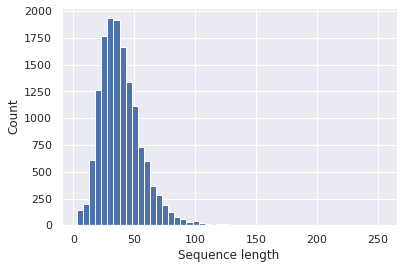

In [36]:
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

In [37]:
num_samples = len(sequence_lengths)
num_negatives = sum(positive_token_labels==0)
num_positives = sum(positive_token_labels>0)
av_positives = np.mean(positive_token_labels[positive_token_labels>0])

print(f"Number of samples: {num_samples}")
print(f"Number of negative samples: {num_negatives}")
print(f"Number of positive samples: {num_positives}")
print(f"Negative/positive ratio: {num_negatives/num_positives:.4f}")
print(f"Average positive tokens: {av_positives}")

Number of samples: 14541
Number of negative samples: 11921
Number of positive samples: 2620
Negative/positive ratio: 4.5500
Average positive tokens: 1.4687022900763358


# FCE

In [38]:
train_dataset = BinaryTokenTSVDataset(
    dataset_name="fce",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="train",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [39]:
val_dataset = BinaryTokenTSVDataset(
    dataset_name="fce",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="dev",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [40]:
def collate_fn(batch):
    sequences, labels, token_labels = [], [], []
    for sequence, label, token_label in batch:
        sequences.append(sequence)
        labels.append(label)
        token_labels.append(token_label)
    return sequences, labels, token_labels

In [41]:
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

In [42]:
sequence_lengths = []
positive_token_labels = []

for idx, (sequences, labels, token_labels) in enumerate(train_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

for idx, (sequences, labels, token_labels) in enumerate(val_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

sequence_lengths = np.array(sequence_lengths)
positive_token_labels = np.array(positive_token_labels)


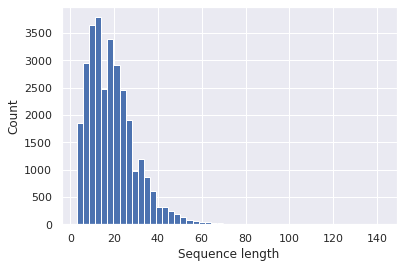

In [43]:
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

In [44]:
num_samples = len(sequence_lengths)
num_negatives = sum(positive_token_labels==0)
num_positives = sum(positive_token_labels>0)
av_positives = np.mean(positive_token_labels[positive_token_labels>0])

print(f"Number of samples: {num_samples}")
print(f"Number of negative samples: {num_negatives}")
print(f"Number of positive samples: {num_positives}")
print(f"Negative/positive ratio: {num_negatives/num_positives:.4f}")
print(f"Average positive tokens: {av_positives}")

Number of samples: 30541
Number of negative samples: 11142
Number of positive samples: 19399
Negative/positive ratio: 0.5744
Average positive tokens: 3.089128305582762


# WI+LOCNESS

In [45]:
train_dataset = BinaryTokenTSVDataset(
    dataset_name="wi_locness",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="train",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [46]:
def collate_fn(batch):
    sequences, labels, token_labels = [], [], []
    for sequence, label, token_label in batch:
        sequences.append(sequence)
        labels.append(label)
        token_labels.append(token_label)
    return sequences, labels, token_labels

In [47]:
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

In [48]:
sequence_lengths = []
positive_token_labels = []

for idx, (sequences, labels, token_labels) in enumerate(train_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

sequence_lengths = np.array(sequence_lengths)
positive_token_labels = np.array(positive_token_labels)


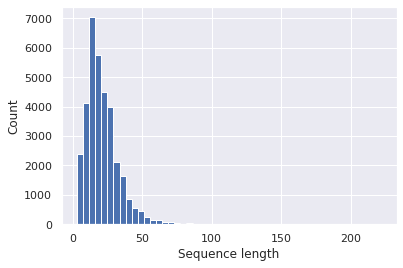

In [49]:
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

In [50]:
num_samples = len(sequence_lengths)
num_negatives = sum(positive_token_labels==0)
num_positives = sum(positive_token_labels>0)
av_positives = np.mean(positive_token_labels[positive_token_labels>0])

print(f"Number of samples: {num_samples}")
print(f"Number of negative samples: {num_negatives}")
print(f"Number of positive samples: {num_positives}")
print(f"Negative/positive ratio: {num_negatives/num_positives:.4f}")
print(f"Average positive tokens: {av_positives}")

Number of samples: 34308
Number of negative samples: 11329
Number of positive samples: 22979
Negative/positive ratio: 0.4930
Average positive tokens: 3.2217241829496497


# Toxic

In [51]:
train_dataset = BinaryTokenTSVDataset(
    dataset_name="toxic",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="train",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [52]:
val_dataset = BinaryTokenTSVDataset(
    dataset_name="toxic",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="dev",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [53]:
def collate_fn(batch):
    sequences, labels, token_labels = [], [], []
    for sequence, label, token_label in batch:
        sequences.append(sequence)
        labels.append(label)
        token_labels.append(token_label)
    return sequences, labels, token_labels

In [54]:
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

In [55]:
sequence_lengths = []
positive_token_labels = []

for idx, (sequences, labels, token_labels) in enumerate(train_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

for idx, (sequences, labels, token_labels) in enumerate(val_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

sequence_lengths = np.array(sequence_lengths)
positive_token_labels = np.array(positive_token_labels)


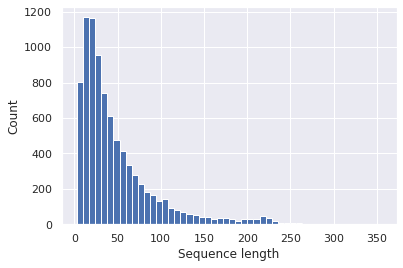

In [56]:
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

In [57]:
num_samples = len(sequence_lengths)
num_negatives = sum(positive_token_labels==0)
num_positives = sum(positive_token_labels>0)
av_positives = np.mean(positive_token_labels[positive_token_labels>0])

print(f"Number of samples: {num_samples}")
print(f"Number of negative samples: {num_negatives}")
print(f"Number of positive samples: {num_positives}")
print(f"Negative/positive ratio: {num_negatives/num_positives:.4f}")
print(f"Average positive tokens: {av_positives}")

Number of samples: 8610
Number of negative samples: 707
Number of positive samples: 7903
Negative/positive ratio: 0.0895
Average positive tokens: 3.318360116411489


# CoNLL-10 JOINT

In [95]:
supervised_heads = [str(i) for i in range(1, 13)]
seq_f1 = [91.83, 90.61, 90.68, 89.50, 93.09, 91.61, 91.28, 91.74, 92.20, 91.40, 91.04, 88.81]
tok_f1 = [72.97, 71.43, 70.87, 66.98, 73.29, 72.35, 71.90, 72.57, 72.86, 69.57, 71.28, 0.00]

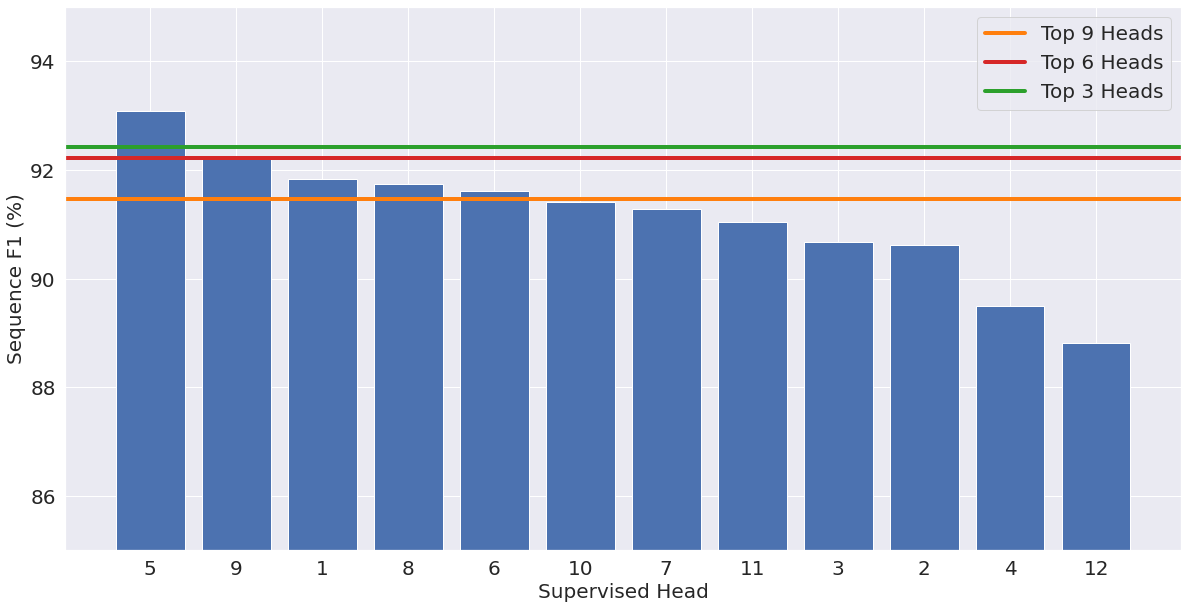

In [96]:
df = pd.DataFrame({"x": supervised_heads, "y": seq_f1}).sort_values("y", ascending=False)

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar("x", "y", data=df)
plt.xlabel("Supervised Head", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

plt.ylim([85,95])

plt.axhline(y=91.47, color="tab:orange", label="Top 9 Heads", linewidth=4)
plt.axhline(y=92.22, color="tab:red", label="Top 6 Heads", linewidth=4)
plt.axhline(y=92.42, color="tab:green", label="Top 3 Heads", linewidth=4)
plt.legend(prop={'size': 20})

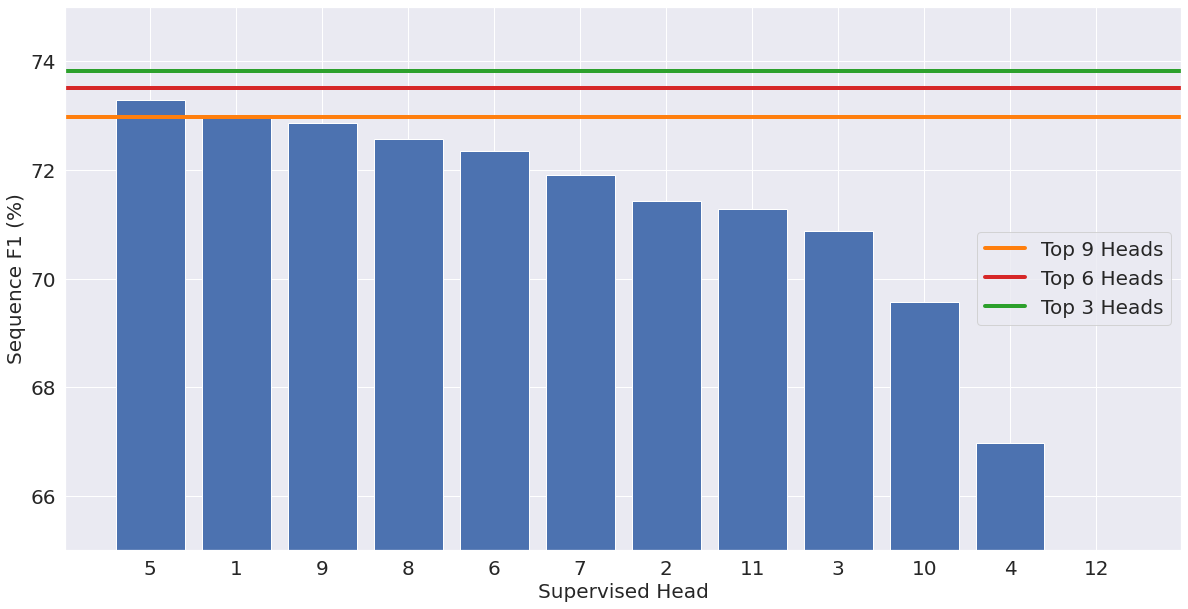

In [98]:
df = pd.DataFrame({"x": supervised_heads, "y": tok_f1}).sort_values("y", ascending=False)

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar("x", "y", data=df)
plt.xlabel("Supervised Head", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

plt.ylim([65,75])

plt.axhline(y=72.98, color="tab:orange", label="Top 9 Heads", linewidth=4)
plt.axhline(y=73.51, color="tab:red", label="Top 6 Heads", linewidth=4)
plt.axhline(y=73.81, color="tab:green", label="Top 3 Heads", linewidth=4)
plt.legend(prop={'size': 20})

# CoNLL-10 TOKEN

In [99]:
supervised_heads = [str(i) for i in range(1, 13)]
seq_f1 = [92.39, 92.86,92.91,92.36,93.47,92.78,92.56,92.50,93.26,92.17,91.40,92.55]
tok_f1 = [74.15,74.67,74.53,0.00,71.58,74.27,74.49,73.59,75.11,72.73,73.73,74.75]

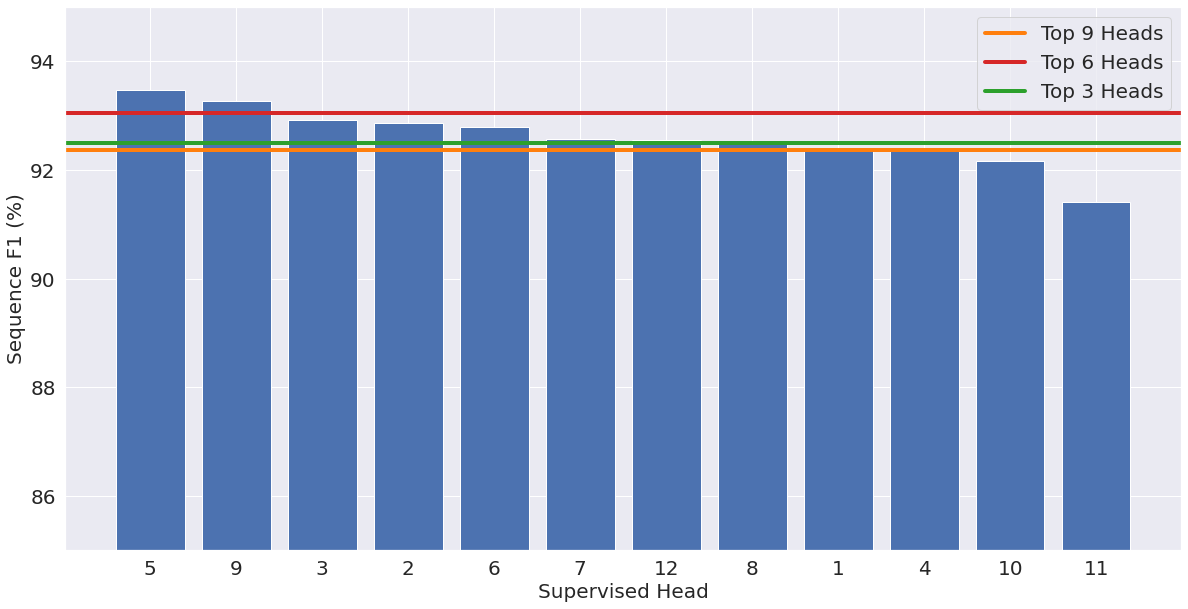

In [100]:
df = pd.DataFrame({"x": supervised_heads, "y": seq_f1}).sort_values("y", ascending=False)

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar("x", "y", data=df)
plt.xlabel("Supervised Head", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

plt.ylim([85,95])

plt.axhline(y=92.36, color="tab:orange", label="Top 9 Heads", linewidth=4)
plt.axhline(y=93.05, color="tab:red", label="Top 6 Heads", linewidth=4)
plt.axhline(y=92.50, color="tab:green", label="Top 3 Heads", linewidth=4)
plt.legend(prop={'size': 20})

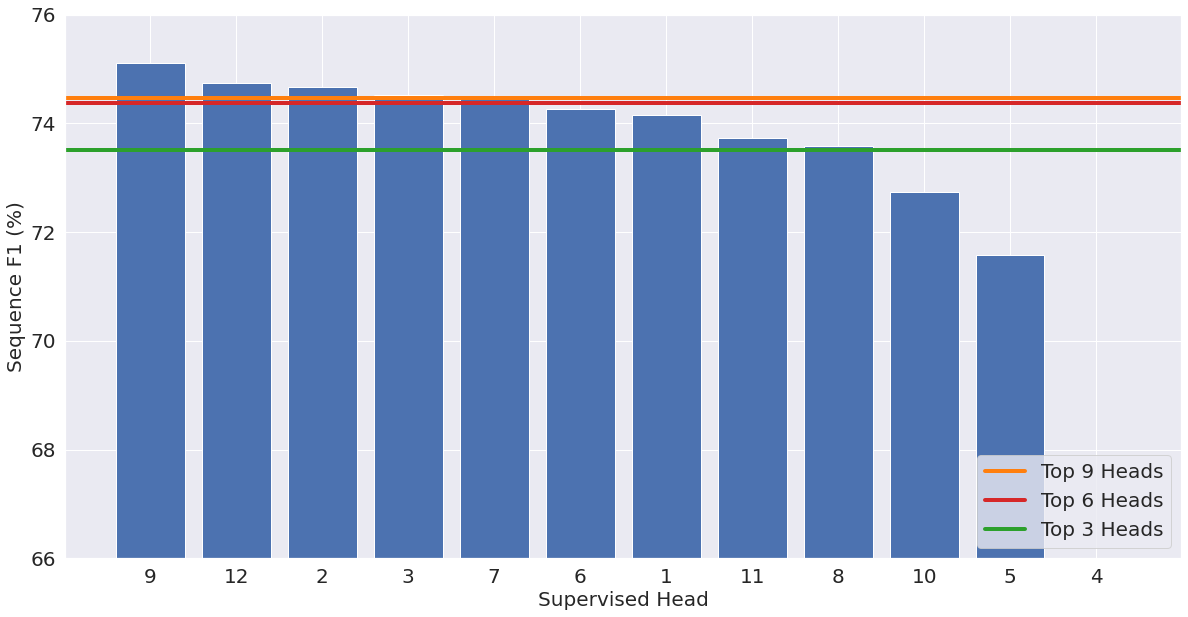

In [101]:
df = pd.DataFrame({"x": supervised_heads, "y": tok_f1}).sort_values("y", ascending=False)

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar("x", "y", data=df)
plt.xlabel("Supervised Head", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

plt.ylim([66,76])

plt.axhline(y=74.46, color="tab:orange", label="Top 9 Heads", linewidth=4)
plt.axhline(y=74.38, color="tab:red", label="Top 6 Heads", linewidth=4)
plt.axhline(y=73.52, color="tab:green", label="Top 3 Heads", linewidth=4)
plt.legend(prop={'size': 20})

# FCE JOINT

In [102]:
supervised_heads = [str(i) for i in range(1, 13)]
seq_f1 = [86.56,86.54,86.95,86.25,86.59,86.73,86.56,86.61,86.76,86.00,86.89,85.78]
tok_f1 = [28.32,29.89,28.92,30.49,25.76,30.64,30.93,31.72,31.19,29.64,30.40,26.64]

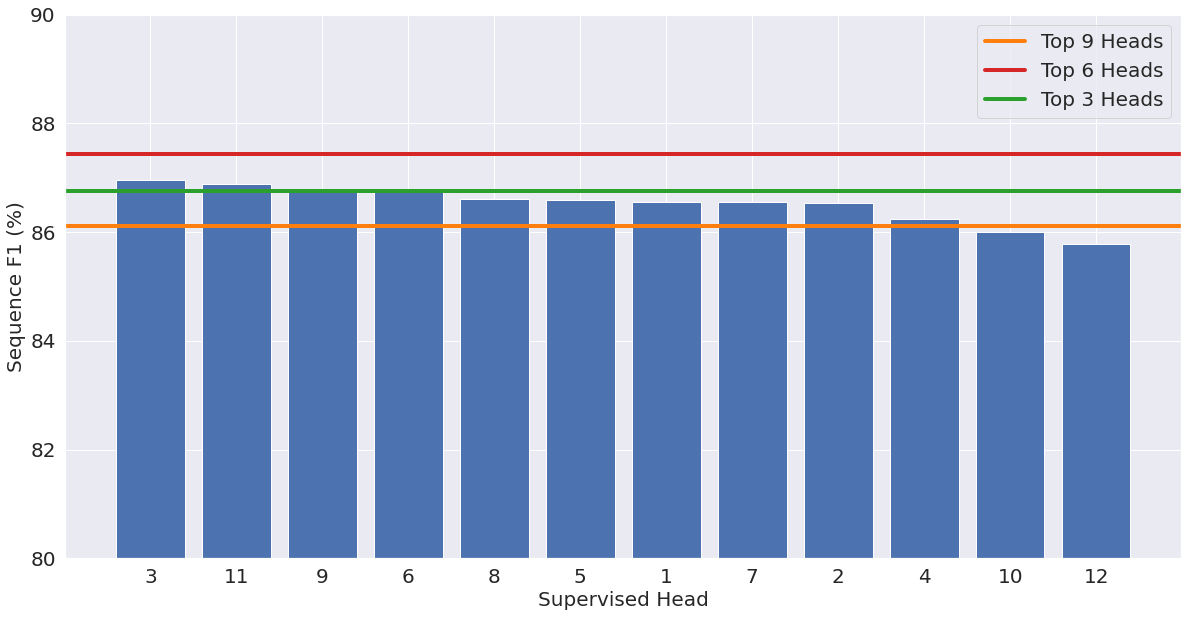

In [103]:
df = pd.DataFrame({"x": supervised_heads, "y": seq_f1}).sort_values("y", ascending=False)

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar("x", "y", data=df)
plt.xlabel("Supervised Head", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

plt.ylim([80,90])

plt.axhline(y=86.12, color="tab:orange", label="Top 9 Heads", linewidth=4)
plt.axhline(y=87.44, color="tab:red", label="Top 6 Heads", linewidth=4)
plt.axhline(y=86.75, color="tab:green", label="Top 3 Heads", linewidth=4)
plt.legend(prop={'size': 20})

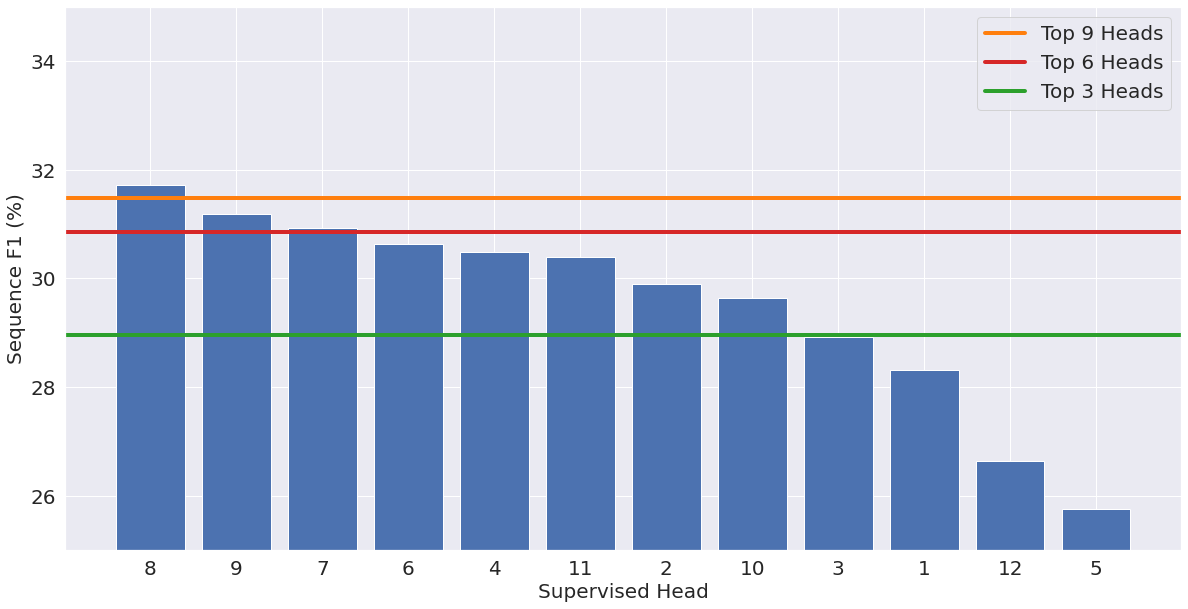

In [104]:
df = pd.DataFrame({"x": supervised_heads, "y": tok_f1}).sort_values("y", ascending=False)

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar("x", "y", data=df)
plt.xlabel("Supervised Head", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

plt.ylim([25,35])

plt.axhline(y=31.49, color="tab:orange", label="Top 9 Heads", linewidth=4)
plt.axhline(y=30.85, color="tab:red", label="Top 6 Heads", linewidth=4)
plt.axhline(y=28.96, color="tab:green", label="Top 3 Heads", linewidth=4)
plt.legend(prop={'size': 20})

# FCE TOKEN

In [105]:
supervised_heads = [str(i) for i in range(1, 13)]
seq_f1 = [86.89,87.41,85.67,85.34,85.51,86.24,86.55,86.80,86.43,85.84,86.35,85.93]
tok_f1 = [34.14,31.86,29.50,32.27,30.59,32.00,31.56,30.60,29.14,27.37,34.07,31.60]

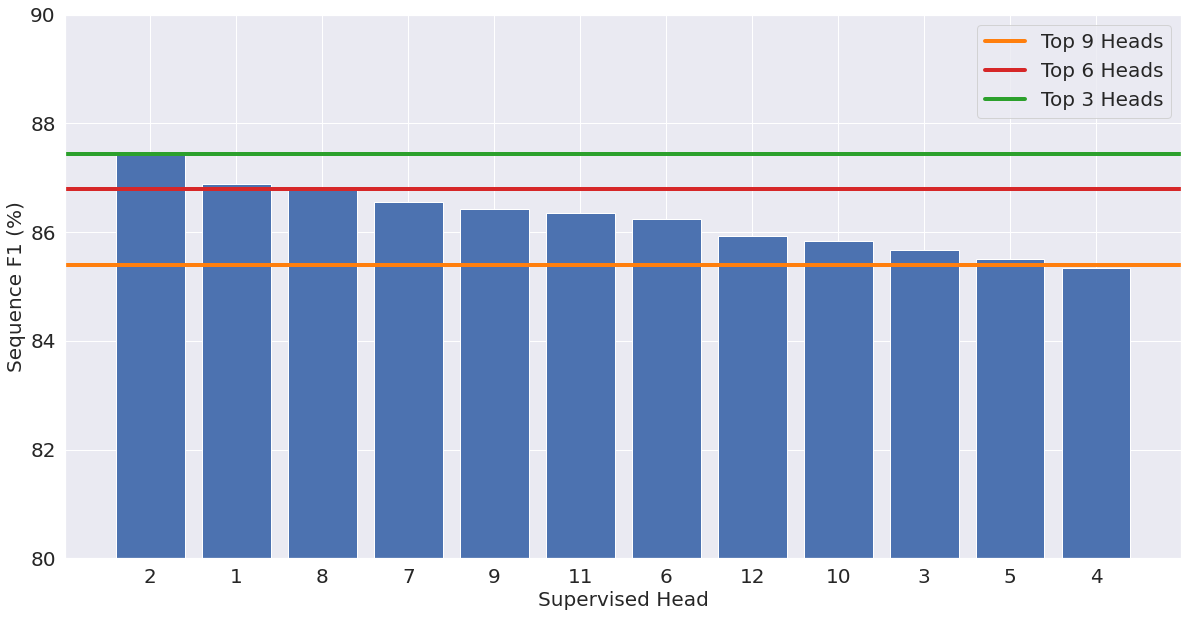

In [106]:
df = pd.DataFrame({"x": supervised_heads, "y": seq_f1}).sort_values("y", ascending=False)

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar("x", "y", data=df)
plt.xlabel("Supervised Head", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

plt.ylim([80,90])

plt.axhline(y=85.39, color="tab:orange", label="Top 9 Heads", linewidth=4)
plt.axhline(y=86.80, color="tab:red", label="Top 6 Heads", linewidth=4)
plt.axhline(y=87.43, color="tab:green", label="Top 3 Heads", linewidth=4)
plt.legend(prop={'size': 20})

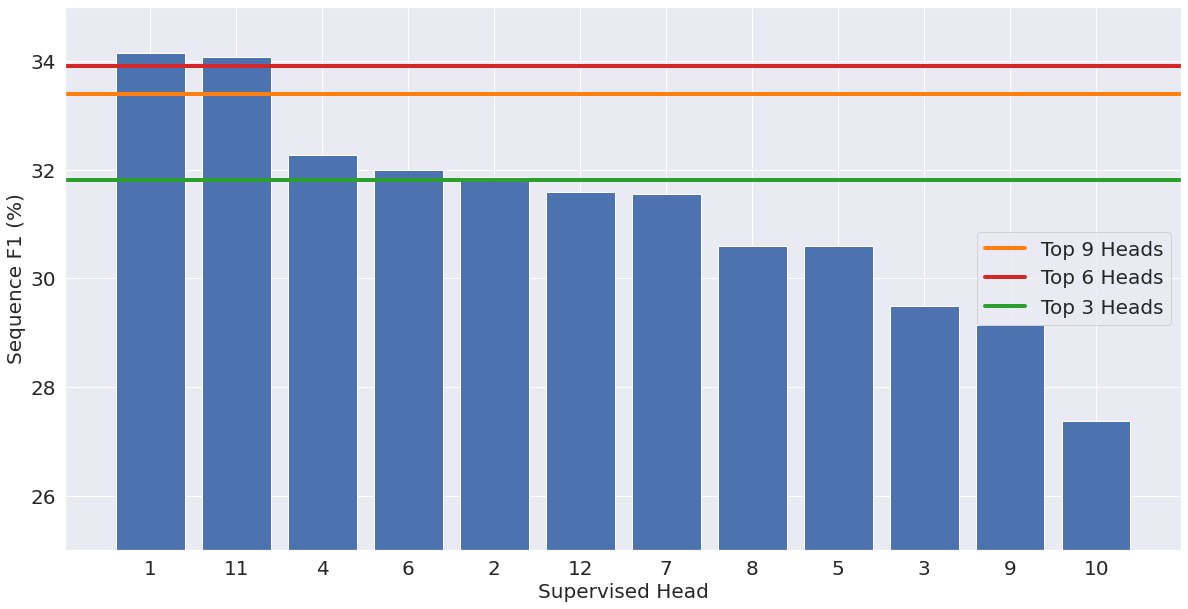

In [107]:
df = pd.DataFrame({"x": supervised_heads, "y": tok_f1}).sort_values("y", ascending=False)

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar("x", "y", data=df)
plt.xlabel("Supervised Head", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

plt.ylim([25,35])

plt.axhline(y=33.39, color="tab:orange", label="Top 9 Heads", linewidth=4)
plt.axhline(y=33.91, color="tab:red", label="Top 6 Heads", linewidth=4)
plt.axhline(y=31.82, color="tab:green", label="Top 3 Heads", linewidth=4)
plt.legend(prop={'size': 20})

# Head Correlation

In [2]:
conll10_joint_seq = [5,9,1,8,6,10,7,11,3,2,4,12]
conll10_joint_tok = [5,1,9,8,6,7,2,11,3,10,4,12]

conll10_token_seq = [5,9,3,2,6,7,12,8,1,4,10,11]
conll10_token_tok = [9,12,2,3,7,6,1,11,8,10,5,4]

fce_joint_seq = [3,11,9,6,8,5,1,7,2,4,10,12]
fce_joint_tok = [8,9,7,6,4,11,2,10,3,1,12,5]

fce_token_seq = [2,1,8,7,9,11,6,12,10,3,5,4]
fce_token_tok = [1,11,4,6,2,12,7,8,5,3,9,10]

# conll10_joint_seq = [str(i) for i in conll10_joint_seq]
# conll10_joint_tok = [str(i) for i in conll10_joint_tok]

# conll10_token_seq = [str(i) for i in conll10_token_seq]
# conll10_token_tok = [str(i) for i in conll10_token_tok]

# fce_joint_seq = [str(i) for i in fce_joint_seq]
# fce_joint_tok = [str(i) for i in fce_joint_tok]

# fce_token_seq = [str(i) for i in fce_token_seq]
# fce_token_tok = [str(i) for i in fce_token_tok]

model_ranks = [conll10_joint_seq, conll10_joint_tok, conll10_token_seq, conll10_token_tok, fce_joint_seq, fce_joint_tok, fce_token_seq, fce_token_tok]

df = pd.DataFrame([conll10_joint_seq, conll10_joint_tok, conll10_token_seq, conll10_token_tok, fce_joint_seq, fce_joint_tok, fce_token_seq, fce_token_tok])
df = df.T

df.columns = ["CoNLL-10: Int-JOINT (Seq F1)", "CoNLL-10: Int-JOINT (Tok F1)", "CoNLL-10: Int-TOK (Seq F1)", "CoNLL-10: Int-TOK (Tok F1)", "FCE: Int-JOINT (Seq F1)", "FCE: Int-JOINT (Tok F1)", "FCE: Int-TOK (Seq F1)", "FCE: Int-TOK (Tok F1)"]

df

,CoNLL-10: Int-JOINT (Seq F1),CoNLL-10: Int-JOINT (Tok F1),CoNLL-10: Int-TOK (Seq F1),CoNLL-10: Int-TOK (Tok F1),FCE: Int-JOINT (Seq F1),FCE: Int-JOINT (Tok F1),FCE: Int-TOK (Seq F1),FCE: Int-TOK (Tok F1)
0,5,5,5,9,3,8,2,1
1,9,1,9,12,11,9,1,11
2,1,9,3,2,9,7,8,4
3,8,8,2,3,6,6,7,6
4,6,6,6,7,8,4,9,2
5,10,7,7,6,5,11,11,12
6,7,2,12,1,1,2,6,7
7,11,11,8,11,7,10,12,8
8,3,3,1,8,2,3,10,5
9,2,10,4,10,4,1,3,3


In [3]:
rows = []

for i in range(len(model_ranks)):
    values = []
    a_model = model_ranks[i]
    a_rank = list(range(12))

    for j in range(len(model_ranks)):
        b_model = model_ranks[j]
        b_rank = [a_model.index(k) for k in b_model]
        # score = pearsonr(a_rank, b_rank)[0]
        score = spearmanr(a_rank, b_rank).correlation

        values.append(score)
    rows.append(values)

df = pd.DataFrame(rows)
df.columns = ["CoNLL-10: Int-JOINT (Seq F1)", "CoNLL-10: Int-JOINT (Tok F1)", "CoNLL-10: Int-TOK (Seq F1)", "CoNLL-10: Int-TOK (Tok F1)", "FCE: Int-JOINT (Seq F1)", "FCE: Int-JOINT (Tok F1)", "FCE: Int-TOK (Seq F1)", "FCE: Int-TOK (Tok F1)"]
df.index = ["CoNLL-10: Int-JOINT (Seq F1)", "CoNLL-10: Int-JOINT (Tok F1)", "CoNLL-10: Int-TOK (Seq F1)", "CoNLL-10: Int-TOK (Tok F1)", "FCE: Int-JOINT (Seq F1)", "FCE: Int-JOINT (Tok F1)", "FCE: Int-TOK (Seq F1)", "FCE: Int-TOK (Tok F1)"]

df

        
    

,CoNLL-10: Int-JOINT (Seq F1),CoNLL-10: Int-JOINT (Tok F1),CoNLL-10: Int-TOK (Seq F1),CoNLL-10: Int-TOK (Tok F1),FCE: Int-JOINT (Seq F1),FCE: Int-JOINT (Tok F1),FCE: Int-TOK (Seq F1),FCE: Int-TOK (Tok F1)
CoNLL-10: Int-JOINT (Seq F1),1.000000,0.902098,0.328671,-0.181818,0.398601,0.125874,0.174825,-0.272727
CoNLL-10: Int-JOINT (Tok F1),0.902098,1.000000,0.461538,-0.041958,0.433566,0.125874,0.398601,-0.020979
CoNLL-10: Int-TOK (Seq F1),0.328671,0.461538,1.000000,0.454545,0.307692,-0.090909,-0.027972,-0.440559
CoNLL-10: Int-TOK (Tok F1),-0.181818,-0.041958,0.454545,1.000000,0.146853,0.083916,0.440559,-0.139860
FCE: Int-JOINT (Seq F1),0.398601,0.433566,0.307692,0.146853,1.000000,0.279720,0.062937,-0.055944
FCE: Int-JOINT (Tok F1),0.125874,0.125874,-0.090909,0.083916,0.279720,1.000000,0.356643,-0.055944
FCE: Int-TOK (Seq F1),0.174825,0.398601,-0.027972,0.440559,0.062937,0.356643,1.000000,0.265734
FCE: Int-TOK (Tok F1),-0.272727,-0.020979,-0.440559,-0.139860,-0.055944,-0.055944,0.265734,1.000000


In [4]:
corr = df.corr(method="pearson")

spearmanr(conll10_joint_seq, conll10_joint_tok)

SpearmanrResult(correlation=0.20979020979020982, pvalue=0.5128409431818263)

<AxesSubplot:>

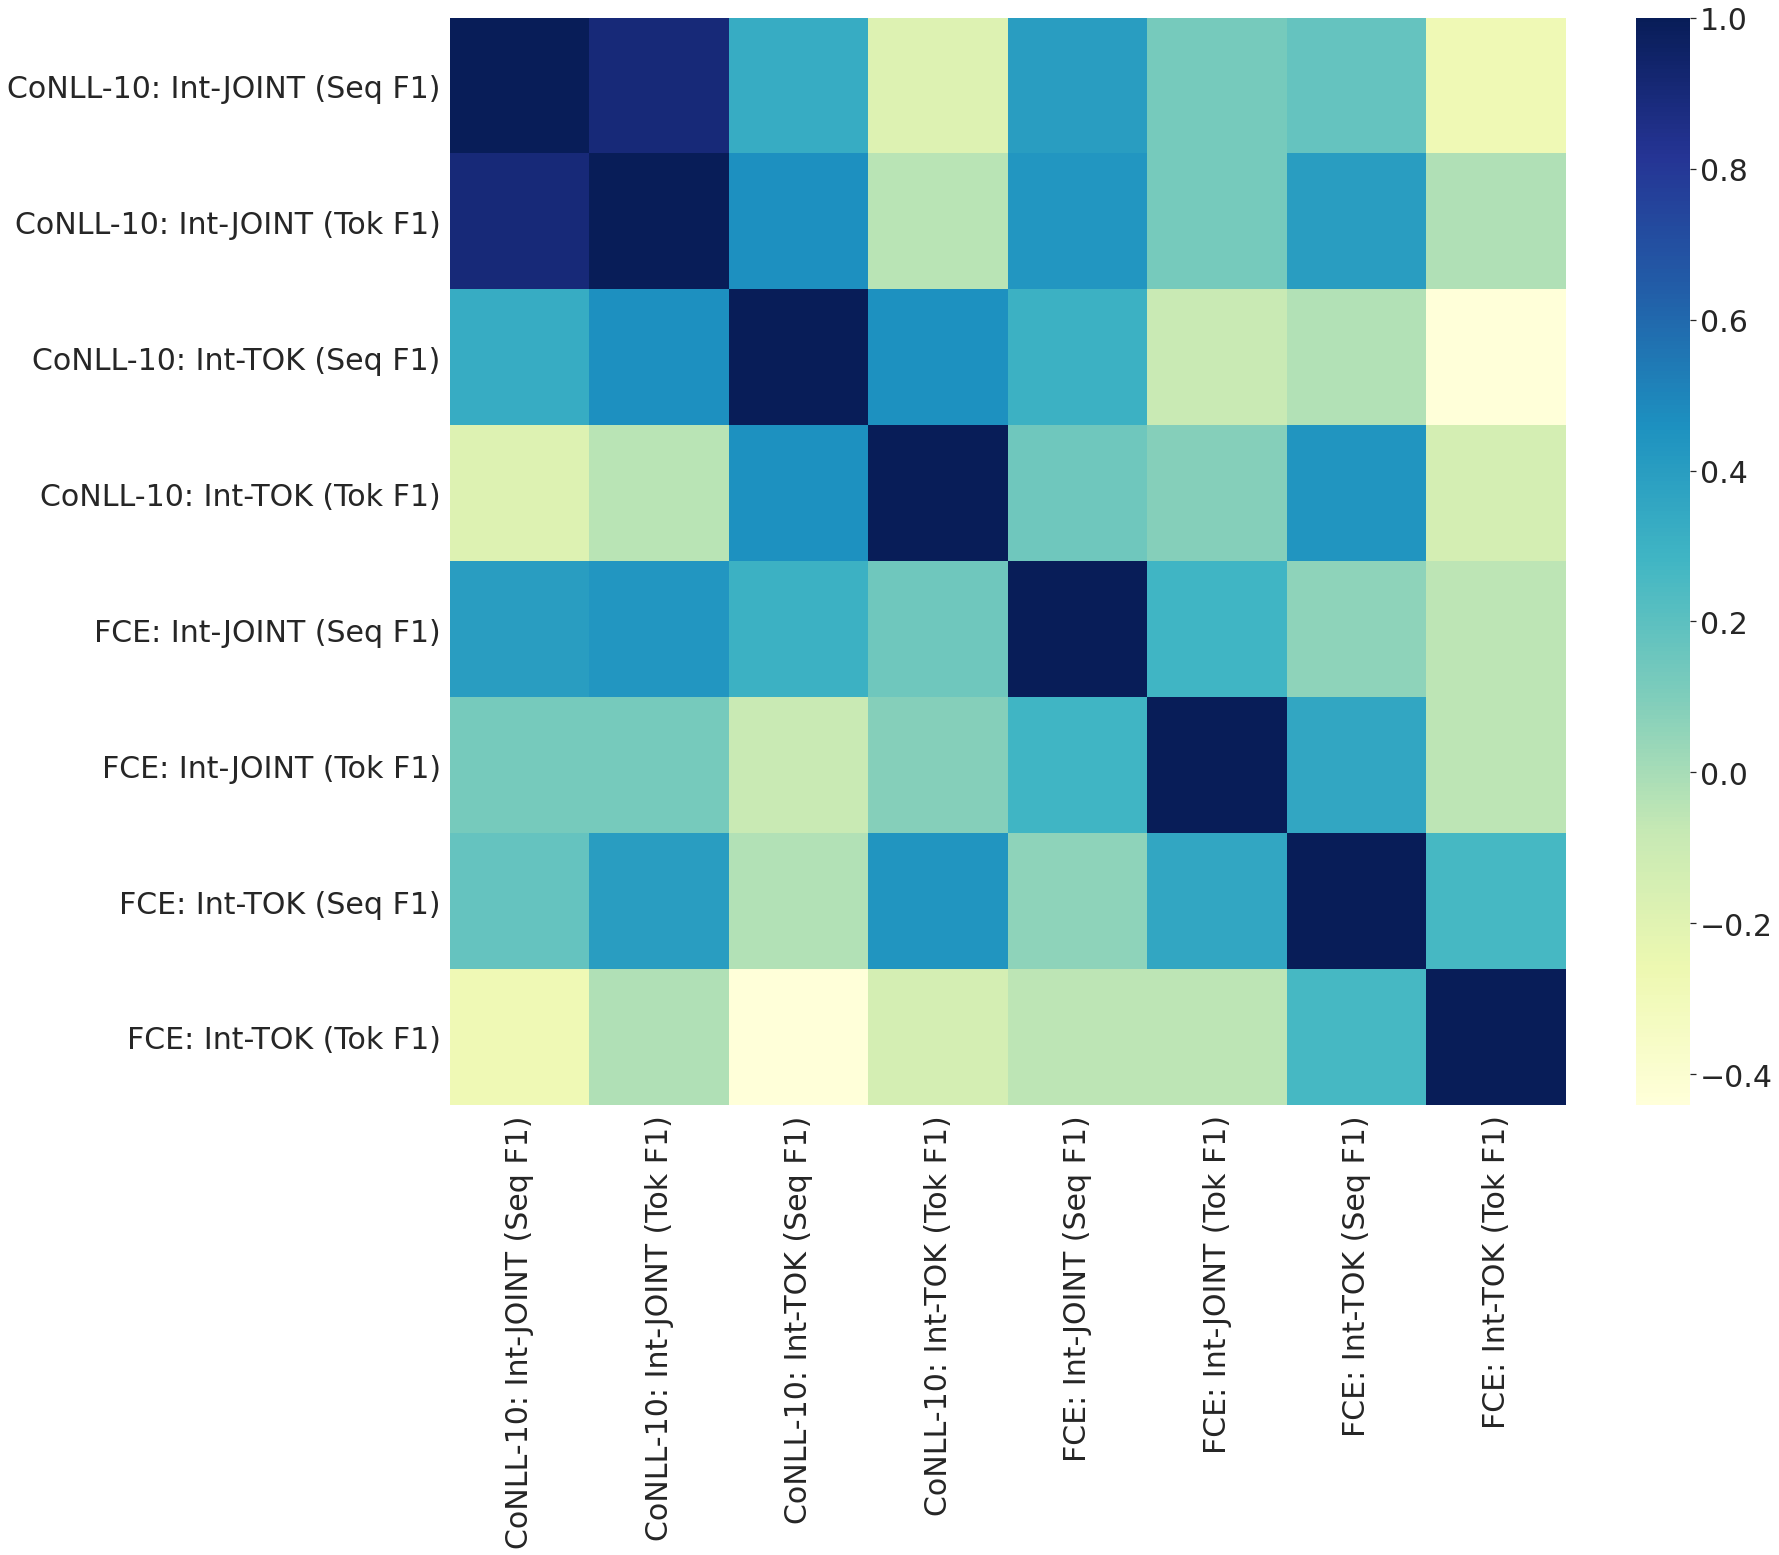

In [11]:
fig = plt.figure(figsize=(25,20))
plt.rc('xtick',labelsize=30)
plt.rc('ytick',labelsize=30)
sns.heatmap(df, cmap="YlGnBu")

# Toxic

Text(0, 0.5, 'Sequence F1 (%)')

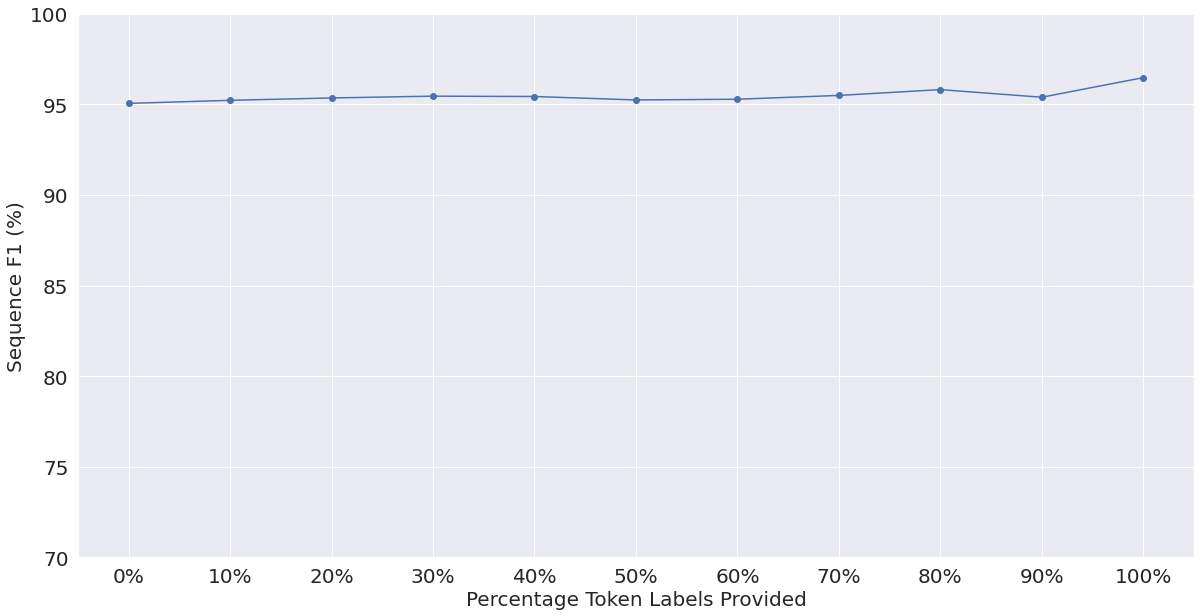

In [22]:
x = ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
y = [95.05,95.22,95.35,95.45,95.43,95.24,95.28,95.49,95.81,95.39,96.47]

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.ylim((70,100))
plt.plot(x, y, "-o")
plt.xlabel("Percentage Token Labels Provided", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

Text(0, 0.5, 'Token F1 (%)')

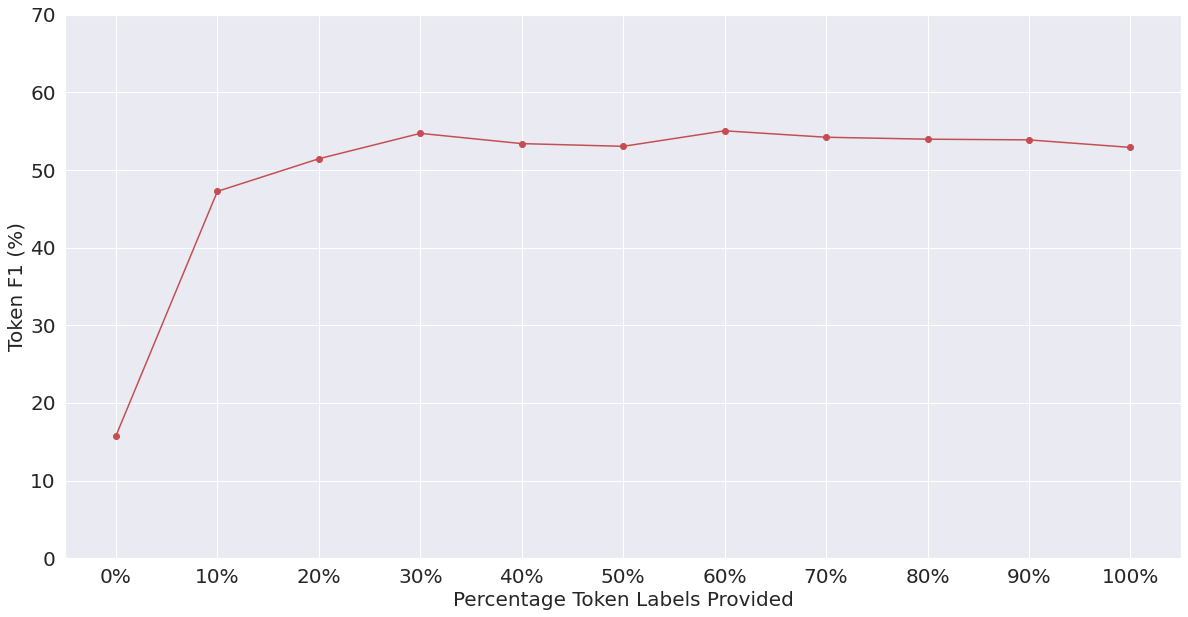

In [24]:
x = ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
y = [15.77,47.25,51.45,54.72,53.40,53.05,55.05,54.22,53.97,53.88,52.91]

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.ylim((0,70))
plt.plot(x, y, "-o", color="r")
plt.xlabel("Percentage Token Labels Provided", size=20)
plt.ylabel("Token F1 (%)", size=20)

# CoNLL-10

Text(0, 0.5, 'Sequence F1 (%)')

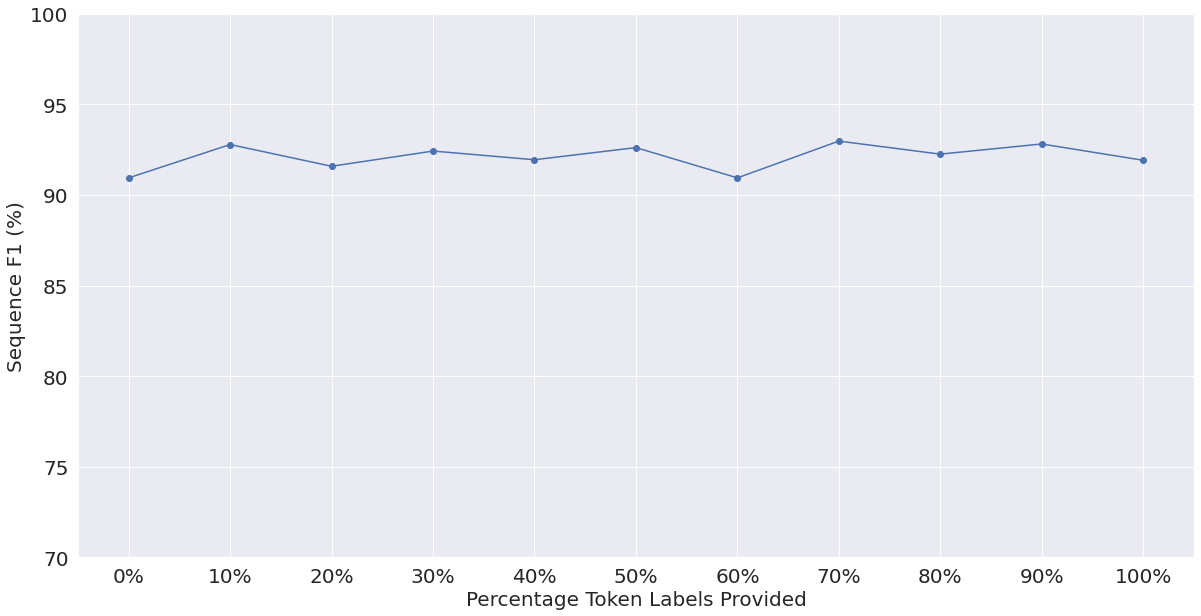

In [26]:
x = ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
y = [90.94,92.78,91.58,92.42,91.94,92.61,90.94,92.97,92.25,92.81,91.91]

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.ylim((70,100))
plt.plot(x, y, "-o")
plt.xlabel("Percentage Token Labels Provided", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

Text(0, 0.5, 'Token F1 (%)')

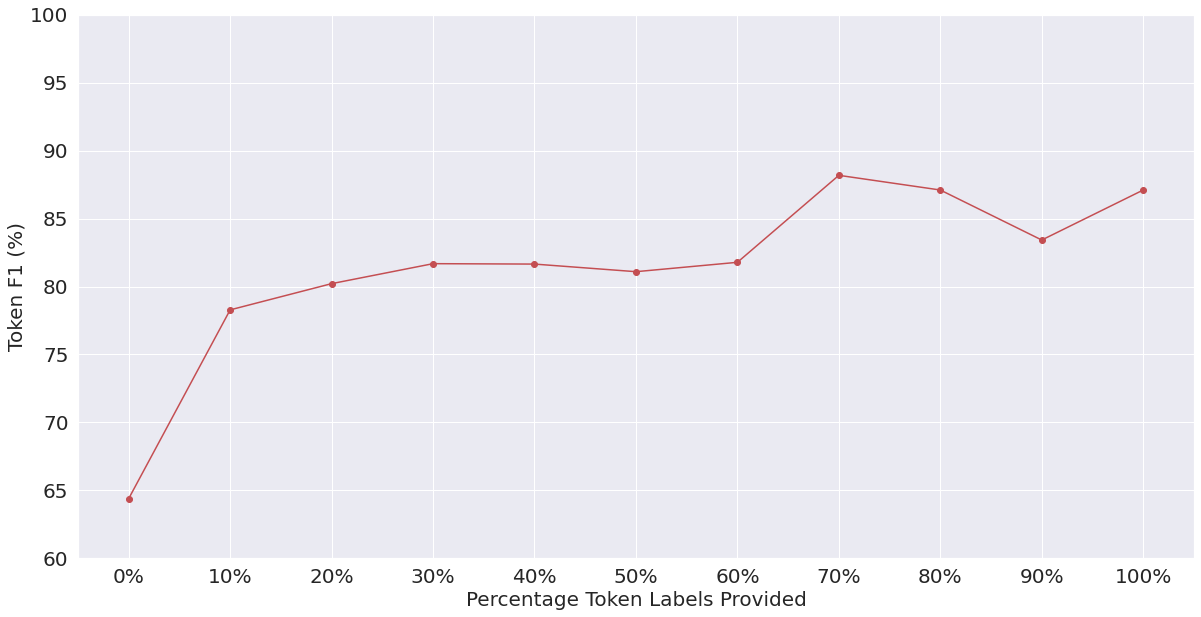

In [28]:
x = ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
y = [64.39,78.28,80.21,81.68,81.65,81.09,81.78,88.18,87.10,83.42,87.10]

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.ylim((60,100))
plt.plot(x, y, "-o", color="r")
plt.xlabel("Percentage Token Labels Provided", size=20)
plt.ylabel("Token F1 (%)", size=20)

# FCE

Text(0, 0.5, 'Sequence F1 (%)')

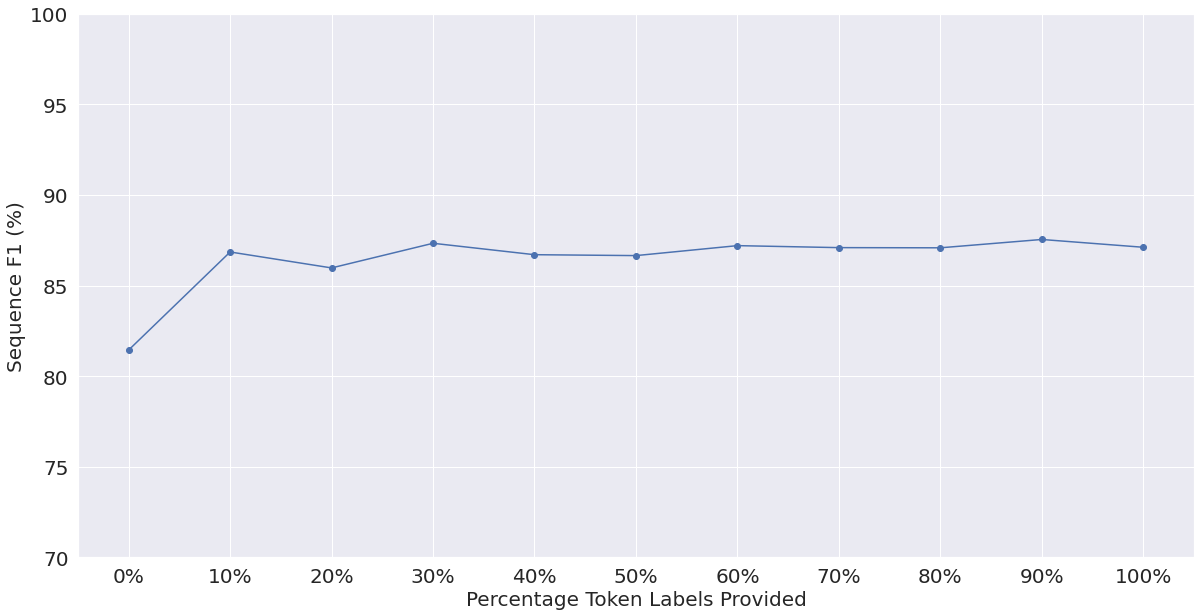

In [29]:
x = ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
y = [81.44,86.85,85.97,87.33,86.7,86.65,87.2,87.09,87.08,87.54,87.11]

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.ylim((70,100))
plt.plot(x, y, "-o")
plt.xlabel("Percentage Token Labels Provided", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

Text(0, 0.5, 'Token F1 (%)')

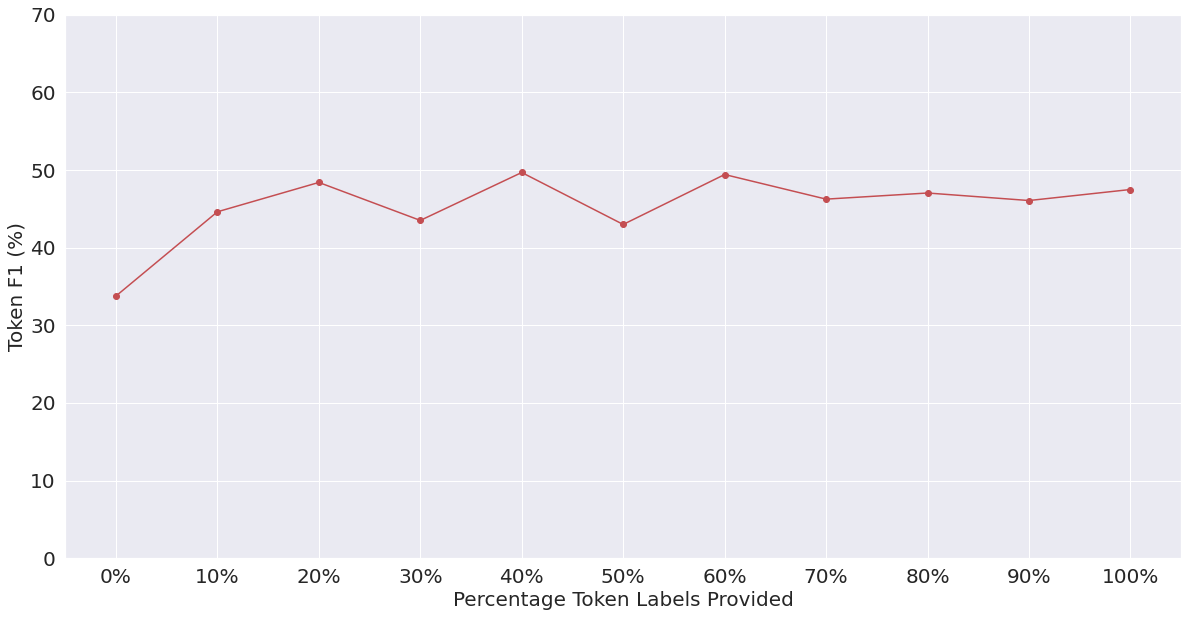

In [30]:
x = ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
y = [33.77,44.62,48.4,43.51,49.68,42.99,49.42,46.25,47.04,46.07,47.49]

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.ylim((0,70))
plt.plot(x, y, "-o", color="r")
plt.xlabel("Percentage Token Labels Provided", size=20)
plt.ylabel("Token F1 (%)", size=20)

# WI+LOCNESS

Text(0, 0.5, 'Sequence F1 (%)')

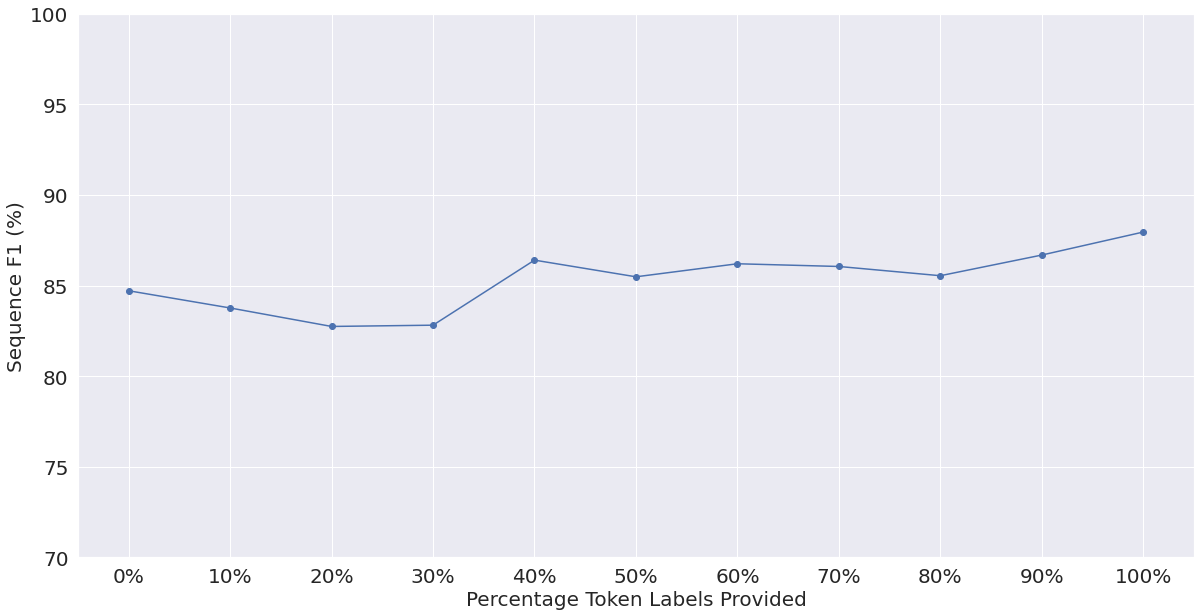

In [31]:
x = ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
y = [84.71,83.76,82.74,82.81,86.40,85.48,86.20,86.05,85.54,86.68,87.95]

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.ylim((70,100))
plt.plot(x, y, "-o")
plt.xlabel("Percentage Token Labels Provided", size=20)
plt.ylabel("Sequence F1 (%)", size=20)

Text(0, 0.5, 'Token F1 (%)')

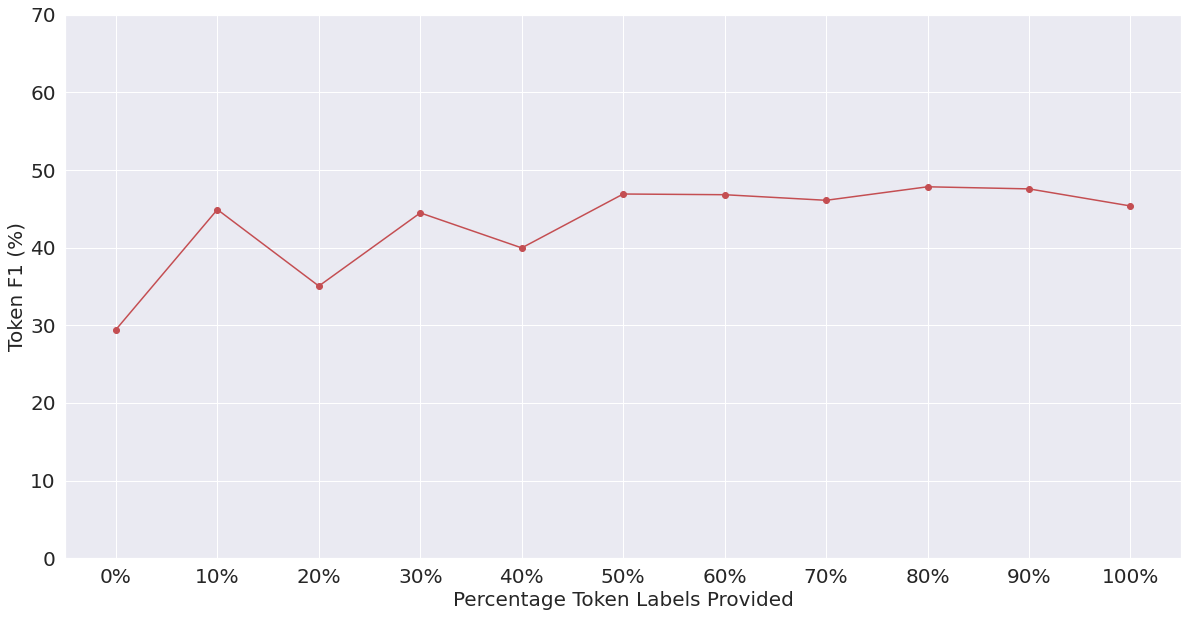

In [32]:
x = ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"]
y = [29.45,44.91,35.06,44.48,39.97,46.91,46.82,46.10,47.84,47.57, 45.37]

plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.ylim((0,70))
plt.plot(x, y, "-o", color="r")
plt.xlabel("Percentage Token Labels Provided", size=20)
plt.ylabel("Token F1 (%)", size=20)